In [1]:
!pip install -U plotly
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 13.2MB 290kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 1.0MB 3.8MB/s 


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr

import importlib.util
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import datetime
import plotly as pl

drive.mount("/content/drive")
pd.options.plotting.backend = "plotly"


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from platform import python_version

print(f"python: {python_version() }")
print(f"numpy: {np.version.version }")
print(f"pandas: {pd.__version__}")
print(f"plotly: {pl.__version__}")
print(f"----------------------")
print(f"tensorflow: {tf.__version__}")
print(f"keras: {tf.keras.__version__}")

python: 3.7.10
numpy: 1.19.5
pandas: 1.1.5
plotly: 4.14.3
----------------------
tensorflow: 2.4.1
keras: 2.4.0


In [ ]:
spec = importlib.util.spec_from_file_location("generalUtilityFunctions.py","./drive/MyDrive/Colab_Notebooks/generalUtilityFunctions.py")
gUF = importlib.util.module_from_spec(spec)
spec.loader.exec_module(gUF)

In [ ]:
test_s = pd.Series([np.nan, 1,1, np.nan,2,2, np.nan])
test_s_int = test_s.interpolate()

test_s.plot()

In [ ]:
test_s_int.plot()

In [ ]:
data_hourly_inside = pd.read_pickle("./drive/MyDrive/Colab_Notebooks/bachelor_data/DATA_hourly_inside.pkl")
DATA = data_hourly_inside

print(f'{list(DATA.columns.levels[1])}, len: {len(list(DATA.columns.levels[1]))}')
print(DATA.shape)
DATA.head()


['CHAU', 'FURT', 'GOGM', 'HIRB', 'KIBE', 'KIEN', 'KITE', 'KOET', 'KOTH', 'LAML', 'LEMI', 'LIND', 'LOHB', 'LOHM', 'MARI', 'NEUH', 'NITT', 'OESB', 'POES', 'REGE', 'RODI', 'SAEG', 'SANK', 'SCHK', 'TEAC', 'TEAT', 'TEIS', 'VIER', 'WEID', 'ZWIE', 'ZWIG'], len: 31
(113736, 46)


Parameter              n                      ... xglob  xludr xwind      zsos
Stationskennung     LIND NEUH NITT RODI SCHK  ...  KITE   REGE  REGE KITE REGE
TimeStamp                                     ...                             
2005-01-11 00:00:00  0.0  0.0  0.0  0.0  0.0  ...   0.3  983.3   1.3  0.4  0.0
2005-01-11 01:00:00  0.0  0.0  0.0  0.0  0.0  ...   0.2  983.6   1.9  0.4  0.0
2005-01-11 02:00:00  0.0  0.0  0.0  0.0  0.0  ...   0.2  984.2   1.6  0.5  0.0
2005-01-11 03:00:00  0.0  0.0  0.0  0.0  0.0  ...   0.2  984.5   1.9  0.7  0.0
2005-01-11 04:00:00  0.0  0.0  0.0  0.0  0.0  ...   0.2  984.8   1.5  0.7  0.0

[5 rows x 46 columns]

In [ ]:
print(f'{list(DATA.columns.levels[0])}, len: {len(list(DATA.columns.levels[0]))}')


start = min(DATA.index)
end = max(DATA.index)
print(f'time from: {str(start)}, to: {str(end)}, len: {(end-start).days / 365 :.2f} years')
print(f'is sum null DATA: {DATA.isnull().sum().sum()}')

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
describe_df = DATA.describe(include = 'all').transpose()

# print(DATA.describe().transpose())

mari = DATA['q','MARI']

describe_df['null_rate'] = DATA.isnull().mean()
describe_df

['n', 'q', 'rflu', 'tlu', 'ttau', 'xglob', 'xludr', 'xwind', 'zsos'], len: 9
time from: 2005-01-11 00:00:00, to: 2018-01-01 23:00:00, len: 12.98 years
is sum null DATA: 37012


count        mean         std      min      25%  \
Parameter Stationskennung                                                       
n         LIND             113736.0    0.143012    0.666329    0.000    0.000   
          NEUH             113736.0    0.097718    0.521054    0.000    0.000   
          NITT             113736.0    0.084114    0.503851    0.000    0.000   
          RODI             113736.0    0.083234    0.503481    0.000    0.000   
          SCHK             113736.0    0.078696    0.502659    0.000    0.000   
          TEIS             113736.0    0.099046    0.555572    0.000    0.000   
          WEID             113736.0    0.093490    0.522485    0.000    0.000   
          KIBE             113736.0    0.108179    0.554276    0.000    0.000   
          LAML             113736.0    0.124081    0.587278    0.000    0.000   
          REGE             113736.0    0.074058    0.456424    0.000    0.000   
          ZWIE             113736.0    0.122101    0.575179    0.000    0.000   
          POES             113736.0    0.083094    0.489784    0.000    0.000   
          KITE             113736.0    0.087407    0.503599    0.000    0.000   
          SANK             113736.0    0.146694    0.665390    0.000    0.000   
q         CHAU             113076.0   23.975759   21.360815    3.850   13.200   
          FURT             113313.0    2.542961    3.213248    0.163    1.250   
          GOGM             107302.0    0.407283    0.496306    0.076    0.244   
          HIRB             108396.0    0.445336    0.557992    0.000    0.191   
          KIEN             113539.0   31.370148   26.300719    4.510   17.800   
          KOET             112954.0    4.072356    3.276615    0.000    2.470   
          KOTH             112534.0    3.679397    4.573106    0.052    1.800   
          LEMI             112609.0    0.928590    1.248442    0.086    0.360   
          LOHB             113061.0    1.141444    1.078898    0.145    0.617   
          LOHM             112405.0    2.619266    1.771615    0.402    1.620   
          MARI             113202.0   34.533140   27.973726    4.620   19.500   
          OESB             112548.0    0.225971    0.408252    0.012    0.081   
          SAEG             112515.0   18.296648   15.961714    0.353   10.300   
          TEAC             111877.0   13.774230   12.060337    1.270    7.490   
          TEAT             112950.0    1.882121    2.258683    0.111    0.927   
          VIER             112173.0    0.764246    1.050918    0.001    0.349   
          ZWIE             113232.0    7.572043    5.972666    1.260    4.340   
          ZWIG             111879.0    4.399701    4.212196    0.010    2.330   
rflu      REGE             113588.0   79.043126   18.204314   15.000   68.000   
          POES             112443.0   83.766445   18.775513   15.000   73.400   
          KITE             110548.0   82.878930   18.710117   15.400   71.400   
tlu       SCHK             113708.0    8.535487    8.487005  -24.300    2.100   
          REGE             113713.0    9.537596    8.685169  -18.800    2.800   
          POES             113195.0    8.741656    8.715934  -23.100    2.000   
          KITE             112930.0    8.655270    8.555717  -19.800    2.000   
ttau      REGE             113658.0    5.507319    6.800429  -19.600    0.500   
xglob     POES             113162.0  120.650488  200.351664    0.000    0.000   
          KITE             112922.0  122.770242  199.777087    0.000    0.100   
xludr     REGE             113643.0  973.256318    7.899714  932.100  968.700   
xwind     REGE             113626.0    2.375685    1.443487    0.000    1.400   
          KITE             112323.0    2.034070    1.585022    0.000    0.800   
zsos      REGE             113516.0   11.076157   20.801142    0.000    0.000   

                               50%      75%      max  null_rate  
Parameter Stationskennung                                        
n        

In [ ]:
'''df = describe_df.copy()
df.update(df.applymap('{:,.3f}'.format))
df'''

In [ ]:
len(DATA)

113736

In [ ]:

for c in DATA.columns.levels[0]:
  print(f'{c} mean: {DATA[c].mean().mean():.2f}, std: {DATA[c].std().mean():.2f},  null rate: {DATA[c].isnull().mean().mean():.3f}')



n mean: 0.10, std: 0.54,  null rate: 0.000
q mean: 8.48, std: 7.43,  null rate: 0.014
rflu mean: 81.90, std: 18.56,  null rate: 0.014
tlu mean: 8.87, std: 8.61,  null rate: 0.003
ttau mean: 5.51, std: 6.80,  null rate: 0.001
xglob mean: 121.71, std: 200.06,  null rate: 0.006
xludr mean: 973.26, std: 7.90,  null rate: 0.001
xwind mean: 2.20, std: 1.51,  null rate: 0.007
zsos mean: 11.08, std: 20.80,  null rate: 0.002


In [ ]:
'''pd.options.display.float_format = "{:,.3f}".format
df.loc[("q", "MARI")]'''

In [ ]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(True)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax


In [ ]:
df2 = pd.DataFrame(describe_df.loc[("q", "MARI")].reset_index()).copy()
df2

,index,q
,,MARI
0,count,113202.000000
1,mean,34.533140
2,std,27.973726
3,min,4.620000
4,25%,19.500000
5,50%,26.300000
6,75%,39.500000
7,max,434.000000
8,null_rate,0.004695


index           object
q      MARI    float64
dtype: object


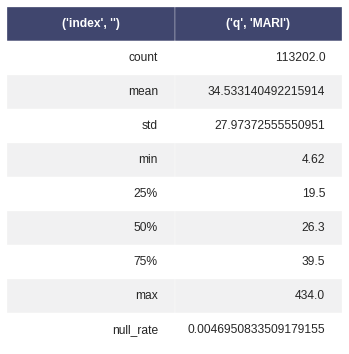

In [ ]:
df2 = pd.DataFrame(describe_df.loc[("q", "MARI")].reset_index()).copy()

print(df2.dtypes)
fig,ax = render_mpl_table(df2)
fig.savefig("mari_summary.png")

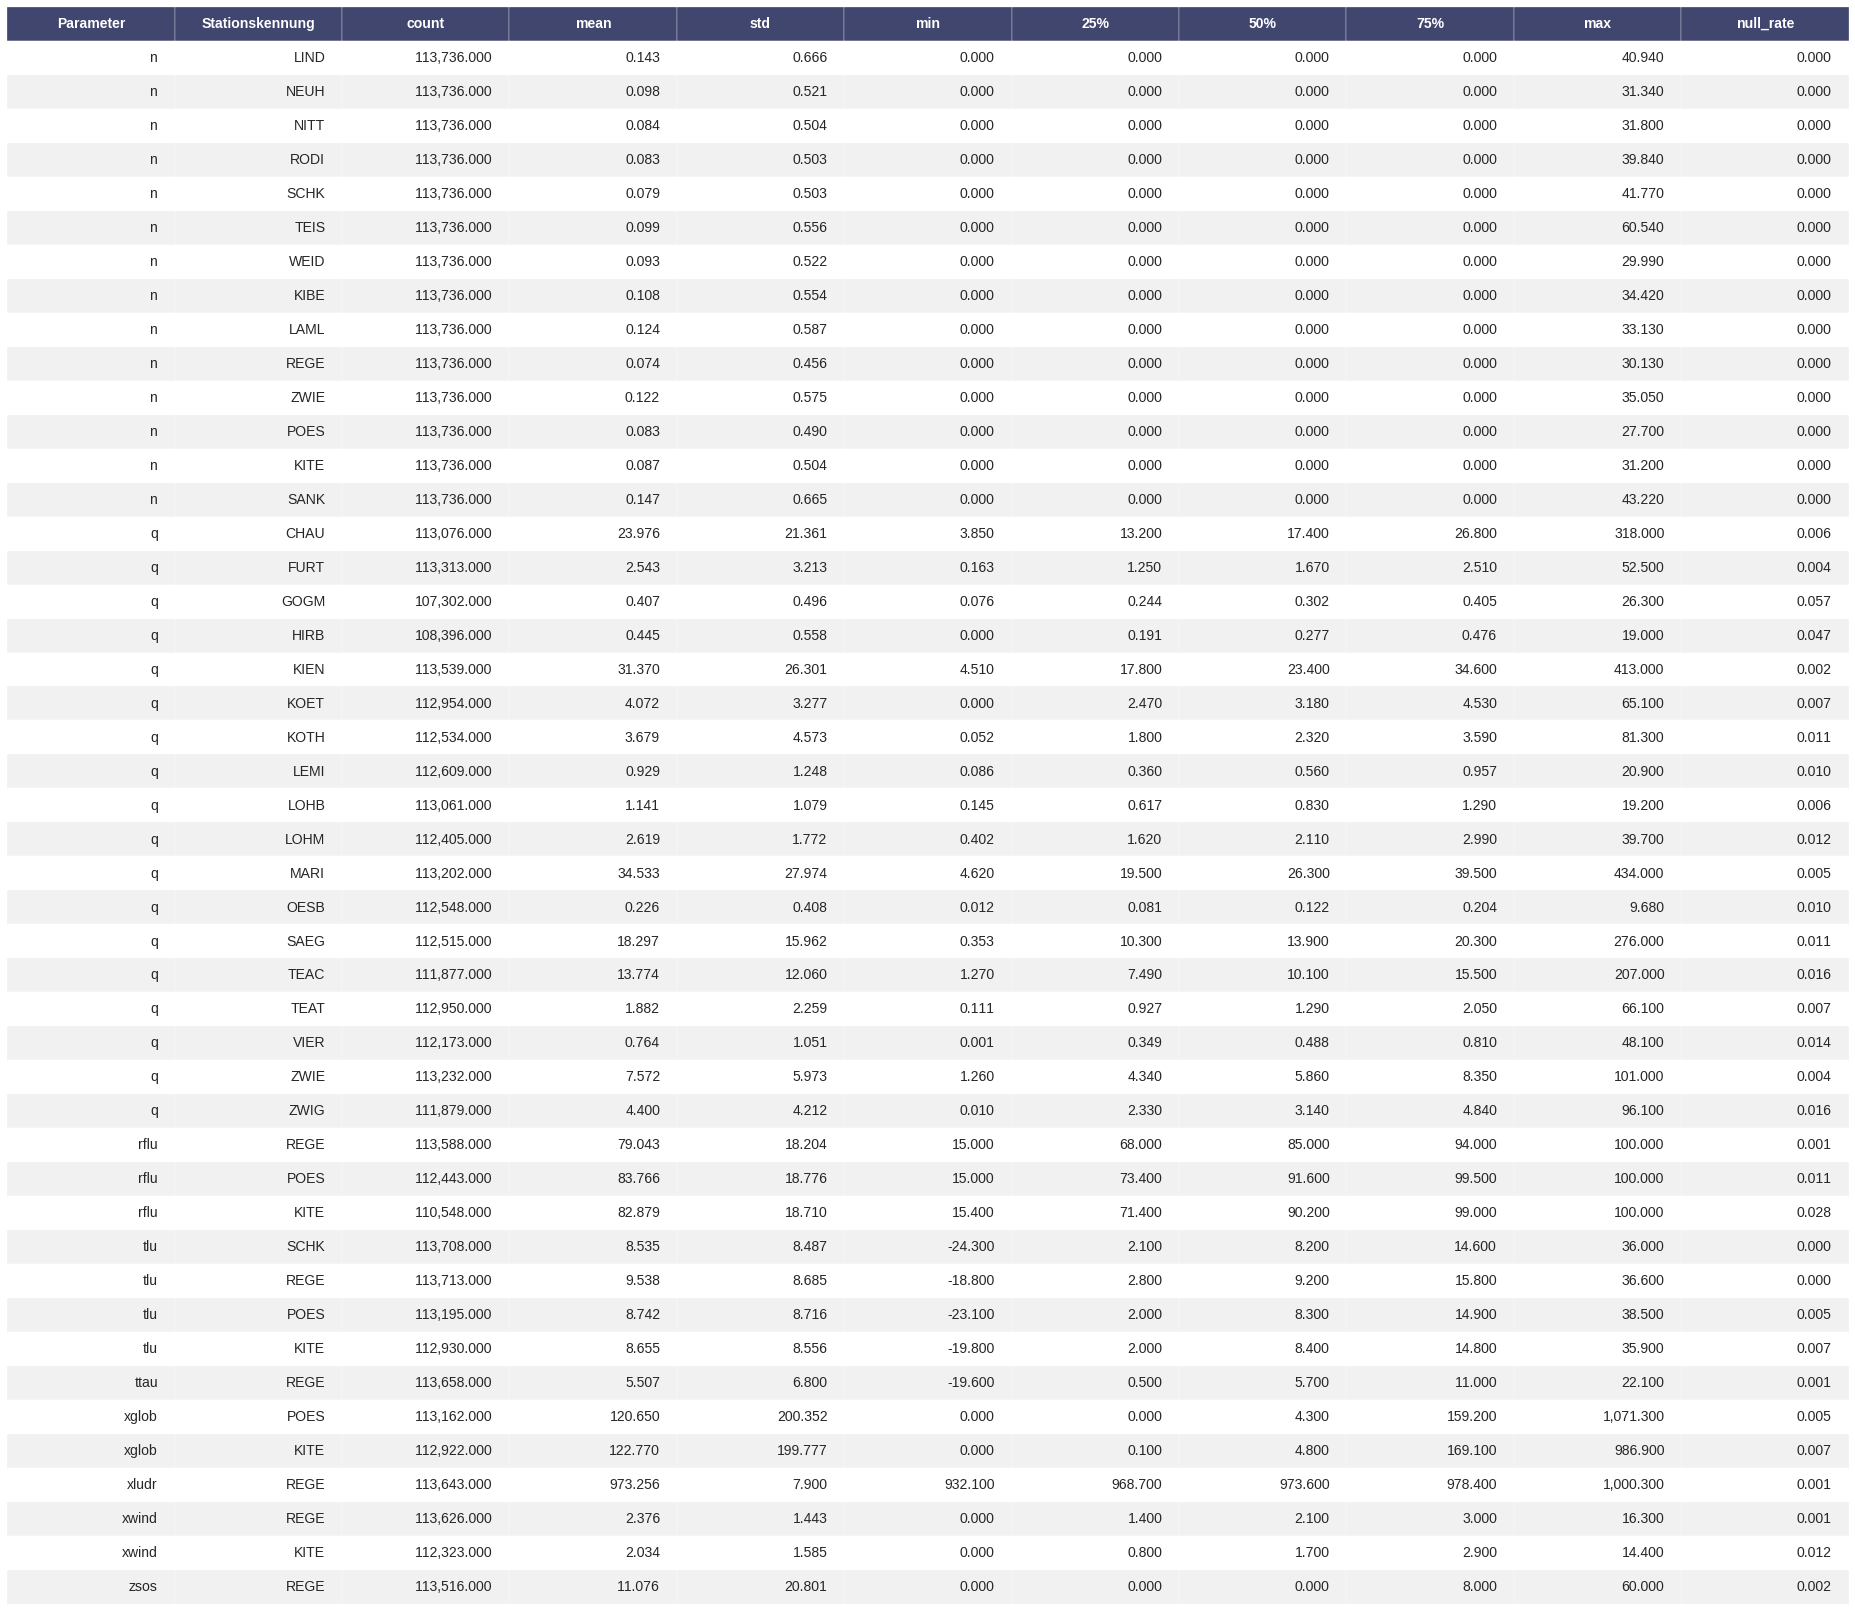

In [ ]:
fig,ax = render_mpl_table(describe_df.reset_index())
fig.savefig("data_summary.png")

In [ ]:
stations_dict = {}

for measure, station in list(DATA.columns.values):
  if station not in stations_dict.keys():
    stations_dict[station] = []
  stations_dict[station].append(measure)

stations_dict


In [ ]:
idx = pd.date_range("2018-01-01", periods=6, freq="H")
test_df = pd.DataFrame({"c": [float("nan"),1,float("nan"),float("nan"),4,float("nan")]}, index=idx)
print(test_df)
test_df.interpolate(method='time', axis=0, limit=None, inplace=True, limit_direction='both')
print(test_df)

                       c
2018-01-01 00:00:00  NaN
2018-01-01 01:00:00  1.0
2018-01-01 02:00:00  NaN
2018-01-01 03:00:00  NaN
2018-01-01 04:00:00  4.0
2018-01-01 05:00:00  NaN
                       c
2018-01-01 00:00:00  1.0
2018-01-01 01:00:00  1.0
2018-01-01 02:00:00  2.0
2018-01-01 03:00:00  3.0
2018-01-01 04:00:00  4.0
2018-01-01 05:00:00  4.0


In [ ]:
# inspired by 
# https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/
# https://www.tensorflow.org/tutorials/text/text_generation

df = pd.read_pickle("./drive/MyDrive/Colab_Notebooks/bachelor_data/DATA_hourly_inside.pkl")



In [ ]:
'''df3 = df.copy()
len_df3 = len(df3)
print(f'len(df3) = {len_df3}')

len_df3m = len(df.dropna(subset=[('q','MARI')]))
len_df3na = len(df.dropna())

print(f'na = {len_df3 -len_df3m}, ratio: {1-(len_df3m/len_df3)}')
print(f'len(df.dropna()) = {len_df3na}, ratio: {1-(len_df3na/len_df3)}')'''

"df3 = df.copy()\nlen_df3 = len(df3)\nprint(f'len(df3) = {len_df3}')\n\nlen_df3m = len(df.dropna(subset=[('q','MARI')]))\nlen_df3na = len(df.dropna())\n\nprint(f'na = {len_df3 -len_df3m}, ratio: {1-(len_df3m/len_df3)}')\nprint(f'len(df.dropna()) = {len_df3na}, ratio: {1-(len_df3na/len_df3)}')"

In [ ]:
df['q','MARI'].interpolate(method='time', axis=0, limit=None, inplace=True, limit_direction='both')
df.columns = [' '.join(col).strip().replace(' ','_') for col in df.columns.values]
df.reset_index(inplace=True)
print(f'{list(df.columns)}, len: {len(list(df.columns))}')
print(df.head())
print(df.shape)

print(df.describe().transpose())

['TimeStamp', 'n_LIND', 'n_NEUH', 'n_NITT', 'n_RODI', 'n_SCHK', 'n_TEIS', 'n_WEID', 'n_KIBE', 'n_LAML', 'n_REGE', 'n_ZWIE', 'n_POES', 'n_KITE', 'n_SANK', 'q_CHAU', 'q_FURT', 'q_GOGM', 'q_HIRB', 'q_KIEN', 'q_KOET', 'q_KOTH', 'q_LEMI', 'q_LOHB', 'q_LOHM', 'q_MARI', 'q_OESB', 'q_SAEG', 'q_TEAC', 'q_TEAT', 'q_VIER', 'q_ZWIE', 'q_ZWIG', 'rflu_REGE', 'rflu_POES', 'rflu_KITE', 'tlu_SCHK', 'tlu_REGE', 'tlu_POES', 'tlu_KITE', 'ttau_REGE', 'xglob_POES', 'xglob_KITE', 'xludr_REGE', 'xwind_REGE', 'xwind_KITE', 'zsos_REGE'], len: 47
            TimeStamp  n_LIND  n_NEUH  n_NITT  n_RODI  n_SCHK  n_TEIS  n_WEID  \
0 2005-01-11 00:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1 2005-01-11 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2 2005-01-11 02:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3 2005-01-11 03:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4 2005-01-11 04:00:00     0.0     0.0     0.0     0.0     0.0     0.0

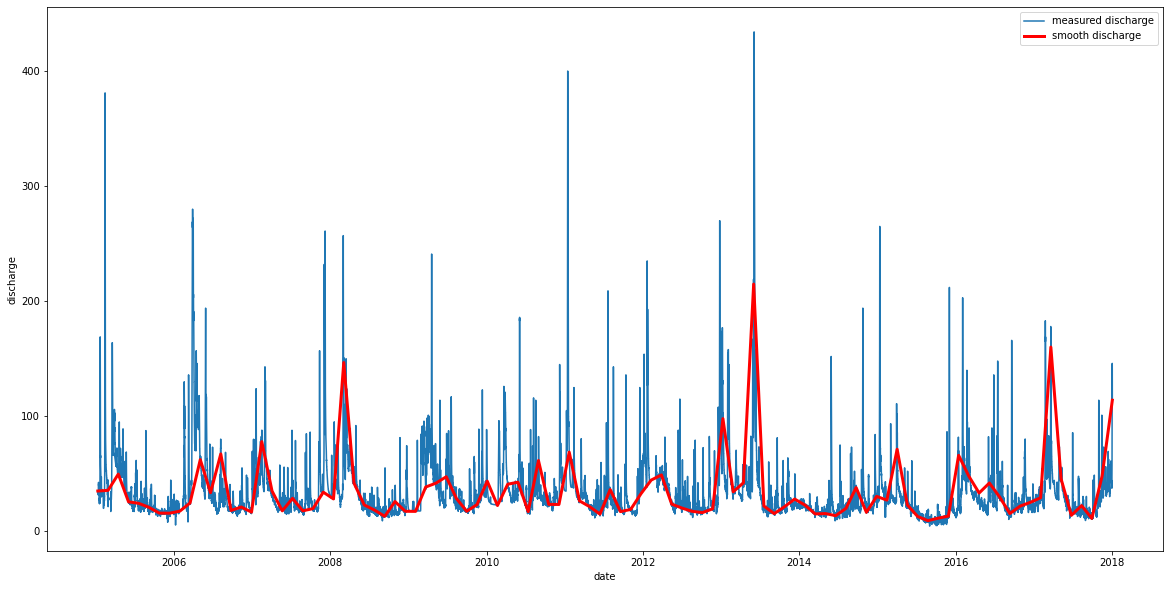

In [ ]:
from scipy.interpolate import make_interp_spline
import matplotlib.dates as dates

# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot

mari = df['q_MARI']

date_np =  np.array(df['TimeStamp'].tolist())
value_np = np.array(df['q_MARI'].tolist())
date_num = dates.date2num(date_np)


date_num_smooth = np.linspace(date_num.min(), date_num.max(), 100) 

spl = make_interp_spline(date_num, value_np, k=5)
value_np_smooth = spl(date_num_smooth)
plt.figure(figsize=(20,10))
plt.plot(date_np, value_np, label="measured discharge")
plt.plot(dates.num2date(date_num_smooth), value_np_smooth, color = "red", linewidth= 3., label="smooth discharge")
plt.legend(loc="upper right")

plt.xlabel("date")
plt.ylabel("discharge")
plt.savefig("smooth_discharge.png")
plt.show()

In [ ]:
df['q_MARI'].mean()

34.4802184005049

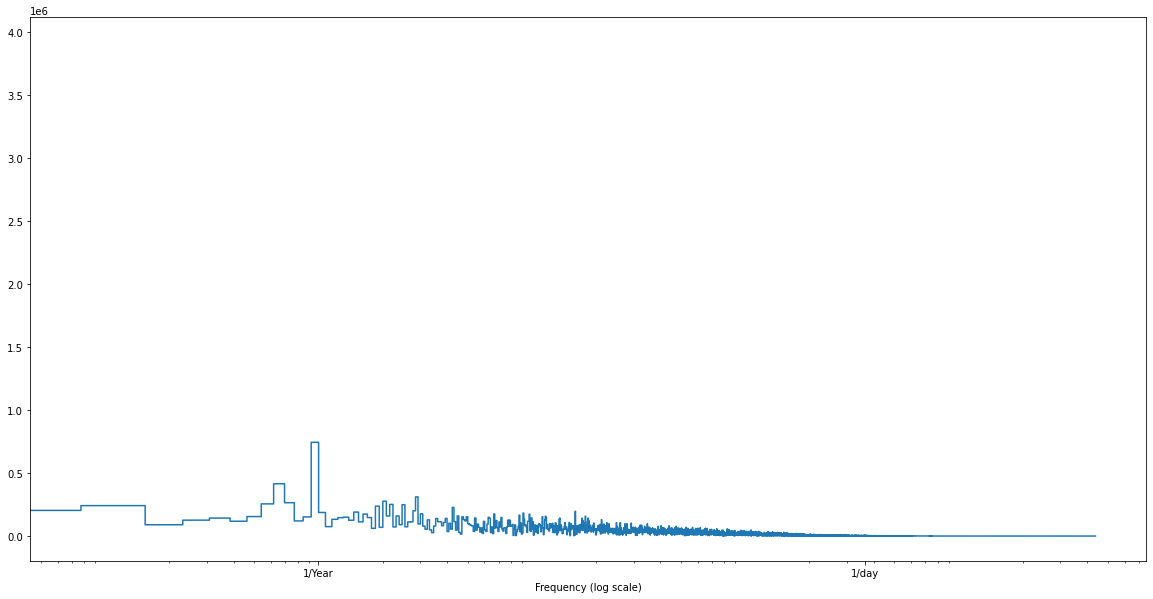

In [ ]:
# feature engeneering
# adjust time values according to
# https://www.tensorflow.org/tutorials/structured_data/time_series
# https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning


fft = tf.signal.rfft(df['q_MARI'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['q_MARI'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(20,10))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.savefig("discharge_mari_fft.png")

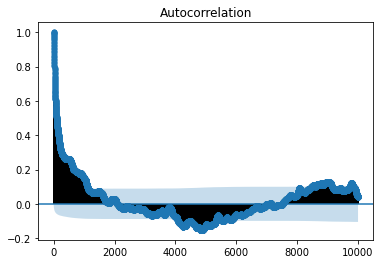

In [ ]:
dta = df['q_MARI']
sm.graphics.tsa.plot_acf(dta, lags=10000)
# day: 24
# month: 24*30 = 720
# year = 8640
plt.show()

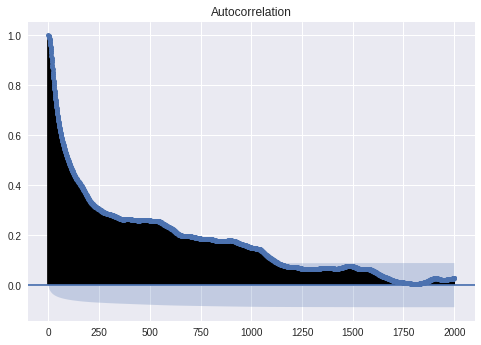

In [ ]:
dta = df['q_MARI']
sm.graphics.tsa.plot_acf(dta, lags=2000, )
# day: 24
# month: 24*30 = 720
# year = 8640

plt.show()

In [ ]:
print(df.columns)

Index(['TimeStamp', 'n_LIND', 'n_NEUH', 'n_NITT', 'n_RODI', 'n_SCHK', 'n_TEIS',
       'n_WEID', 'n_KIBE', 'n_LAML', 'n_REGE', 'n_ZWIE', 'n_POES', 'n_KITE',
       'n_SANK', 'q_CHAU', 'q_FURT', 'q_GOGM', 'q_HIRB', 'q_KIEN', 'q_KOET',
       'q_KOTH', 'q_LEMI', 'q_LOHB', 'q_LOHM', 'q_MARI', 'q_OESB', 'q_SAEG',
       'q_TEAC', 'q_TEAT', 'q_VIER', 'q_ZWIE', 'q_ZWIG', 'rflu_REGE',
       'rflu_POES', 'rflu_KITE', 'tlu_SCHK', 'tlu_REGE', 'tlu_POES',
       'tlu_KITE', 'ttau_REGE', 'xglob_POES', 'xglob_KITE', 'xludr_REGE',
       'xwind_REGE', 'xwind_KITE', 'zsos_REGE'],
      dtype='object')


In [ ]:
times =  df['TimeStamp'].copy()

times_s = df['TimeStamp'].map(datetime.timestamp)
df.drop('TimeStamp', 1, inplace=True)

day = 24*60*60
year = (365.2425)*day

df['yearsin'] = np.sin(times_s * (2 * np.pi / year))
df['yearcos'] = np.cos(times_s * (2 * np.pi / year))

print(f'{list(df.columns)}, len: {len(list(df.columns))}')

df.head()


['n_LIND', 'n_NEUH', 'n_NITT', 'n_RODI', 'n_SCHK', 'n_TEIS', 'n_WEID', 'n_KIBE', 'n_LAML', 'n_REGE', 'n_ZWIE', 'n_POES', 'n_KITE', 'n_SANK', 'q_CHAU', 'q_FURT', 'q_GOGM', 'q_HIRB', 'q_KIEN', 'q_KOET', 'q_KOTH', 'q_LEMI', 'q_LOHB', 'q_LOHM', 'q_MARI', 'q_OESB', 'q_SAEG', 'q_TEAC', 'q_TEAT', 'q_VIER', 'q_ZWIE', 'q_ZWIG', 'rflu_REGE', 'rflu_POES', 'rflu_KITE', 'tlu_SCHK', 'tlu_REGE', 'tlu_POES', 'tlu_KITE', 'ttau_REGE', 'xglob_POES', 'xglob_KITE', 'xludr_REGE', 'xwind_REGE', 'xwind_KITE', 'zsos_REGE', 'yearsin', 'yearcos'], len: 48


,n_LIND,n_NEUH,n_NITT,n_RODI,n_SCHK,n_TEIS,n_WEID,n_KIBE,n_LAML,n_REGE,n_ZWIE,n_POES,n_KITE,n_SANK,q_CHAU,q_FURT,q_GOGM,q_HIRB,q_KIEN,q_KOET,q_KOTH,q_LEMI,q_LOHB,q_LOHM,q_MARI,q_OESB,q_SAEG,q_TEAC,q_TEAT,q_VIER,q_ZWIE,q_ZWIG,rflu_REGE,rflu_POES,rflu_KITE,tlu_SCHK,tlu_REGE,tlu_POES,tlu_KITE,ttau_REGE,xglob_POES,xglob_KITE,xludr_REGE,xwind_REGE,xwind_KITE,zsos_REGE,yearsin,yearcos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.19,0.306,0.247,27.7,3.92,2.86,0.666,1.030,2.08,35.1,0.156,14.9,13.2,1.92,0.613,6.56,3.65,94.0,99.3,99.5,-1.0,1.4,-1.8,0.2,0.7,0.9,0.3,983.3,1.3,0.4,0.0,0.179860,0.983692
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.19,0.301,0.282,27.7,3.92,2.89,0.708,1.030,2.19,35.1,0.156,14.4,13.2,1.92,0.611,6.56,3.62,94.0,99.3,99.5,-1.0,0.7,-2.1,-0.4,0.1,0.9,0.2,983.6,1.9,0.4,0.0,0.180565,0.983563
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.19,0.293,0.282,27.7,3.92,2.80,0.666,1.030,2.12,35.1,0.161,14.4,13.2,1.92,0.609,6.56,3.71,95.0,99.3,99.5,-1.0,-0.1,-3.0,-0.8,-0.7,0.8,0.2,984.2,1.6,0.5,0.0,0.181270,0.983433
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.19,0.293,0.282,27.7,3.81,2.81,0.682,1.030,2.15,35.1,0.159,14.5,13.2,1.91,0.607,6.56,3.65,96.0,99.3,99.5,-1.0,-0.4,-3.1,0.5,-1.3,0.8,0.2,984.5,1.9,0.7,0.0,0.181975,0.983303
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.19,0.293,0.283,27.7,3.75,2.89,0.666,0.954,2.07,35.1,0.156,14.9,13.2,1.83,0.605,6.56,3.55,96.0,99.2,99.5,-1.0,-0.5,-3.6,1.1,-1.0,0.8,0.2,984.8,1.5,0.7,0.0,0.182680,0.983172


In [ ]:
# create train, val and test df
n = len(df)
train_n = int(n*0.7)
val_n = int(n*0.9)
train_df = df[:train_n]
val_df = df[train_n:val_n]
test_df = df[val_n:]

num_features = df.shape[1]
print(num_features)
print(train_df.shape)

48
(79615, 48)


In [ ]:
a = (len(test_df))
a = a - 96
a // 24

469

In [ ]:
test_times = times[val_n:]
test_times.head()

102362   2016-09-15 02:00:00
102363   2016-09-15 03:00:00
102364   2016-09-15 04:00:00
102365   2016-09-15 05:00:00
102366   2016-09-15 06:00:00
Name: TimeStamp, dtype: datetime64[ns]

In [ ]:
test_df2 = df[val_n:].copy()
test_df2.index =  times[val_n:]

test_df2.tail()

,n_LIND,n_NEUH,n_NITT,n_RODI,n_SCHK,n_TEIS,n_WEID,n_KIBE,n_LAML,n_REGE,n_ZWIE,n_POES,n_KITE,n_SANK,q_CHAU,q_FURT,q_GOGM,q_HIRB,q_KIEN,q_KOET,q_KOTH,q_LEMI,q_LOHB,q_LOHM,q_MARI,q_OESB,q_SAEG,q_TEAC,q_TEAT,q_VIER,q_ZWIE,q_ZWIG,rflu_REGE,rflu_POES,rflu_KITE,tlu_SCHK,tlu_REGE,tlu_POES,tlu_KITE,ttau_REGE,xglob_POES,xglob_KITE,xludr_REGE,xwind_REGE,xwind_KITE,zsos_REGE,yearsin,yearcos
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 19:00:00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,74.0,4.55,0.552,NaN,99.5,9.61,9.16,2.29,2.71,3.08,128.0,0.448,34.6,27.0,5.05,1.87,11.1,7.71,73.8,96.3,99.0,4.5,4.1,2.1,3.5,-0.2,0.0,0.0,961.5,4.8,2.4,0.0,0.019811,0.999804
2018-01-01 20:00:00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,70.6,4.34,0.552,NaN,95.7,9.61,9.16,2.21,2.71,3.08,126.0,0.448,33.9,27.0,5.05,1.76,11.1,7.71,76.6,94.5,99.0,3.2,3.7,2.4,3.5,0.0,0.0,0.0,961.0,4.2,2.6,0.0,0.020527,0.999789
2018-01-01 21:00:00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,68.8,4.45,0.552,NaN,91.9,9.82,9.16,2.13,2.71,3.08,123.0,0.429,33.9,27.0,5.05,1.76,10.7,7.71,78.8,92.5,99.0,5.1,3.5,3.0,3.4,0.2,0.0,0.0,960.7,4.1,2.4,0.0,0.021244,0.999774
2018-01-01 22:00:00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.22,0.0,0.0,0.0,0.00,68.8,4.45,0.552,NaN,88.7,10.50,8.94,2.13,2.71,3.08,119.0,0.429,33.1,26.2,4.91,1.76,10.7,7.71,83.3,83.4,99.0,5.2,3.0,4.4,3.1,0.6,0.0,0.0,961.5,3.2,2.1,0.0,0.021960,0.999759
2018-01-01 23:00:00,0.0,0.04,0.8,0.25,0.27,0.04,0.03,0.0,0.0,0.54,0.0,0.0,0.5,0.18,68.8,4.55,0.552,NaN,86.0,8.73,8.94,2.05,2.57,2.90,114.0,0.429,33.1,26.2,4.91,1.76,10.7,7.71,89.6,98.4,99.0,4.4,3.1,3.2,3.5,1.6,0.0,0.0,961.3,4.2,4.6,0.0,0.022677,0.999743


In [ ]:
times.dtype

dtype('<M8[ns]')

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from datetime import datetime

rows = len(df.columns)
fig = make_subplots(rows=rows, cols=1, subplot_titles=df.columns)

j = 1
for i in df.columns:
    fig.add_trace(
        go.Scatter(
            {'x': df.index, 
             'y': df[i]},text = i), 
             row=j, col=1)
    j += 1


#fig = px.line(test_df2)
#fig.add_vrect(x0=datetime(2017, 1, 15), x1=datetime(2017, 2, 20), fillcolor="green", opacity=0.25)
# q_CHAU, q_LOHM, q_TEAC, q_ZWIE, 

# fig.update_layout(height=6*1200, width=2000)
fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from datetime import datetime

rows = len(test_df2.columns)
fig = make_subplots(rows=rows, cols=1, subplot_titles=test_df2.columns)

j = 1
for i in test_df2.columns:
    fig.add_trace(
        go.Scatter(
            {'x': test_df2.index, 
             'y': test_df2[i]},text = i), 
             row=j, col=1)
    # fig.add_vrect(x0=datetime(2017, 1, 15), x1=datetime(2017, 2, 20), fillcolor="green", opacity=0.25)
    j += 1


#fig = px.line(test_df2)
#fig.add_vrect(x0=datetime(2017, 1, 15), x1=datetime(2017, 2, 20), fillcolor="green", opacity=0.25)
# q_CHAU, q_LOHM, q_TEAC, q_ZWIE, 

fig.update_layout(height=6*1200, width=2000)
fig.show()

In [ ]:

fig = px.line(test_df2[['q_CHAU', 'q_LOHM', 'q_TEAC', 'q_ZWIE']], labels={
                              "value": "discharge in m^3/s",
                              "TimeStamp": "time"},
                            width=2*500,
                            height=500)
fig.add_vrect(x0=datetime(2017, 1, 18), x1=datetime(2017, 2, 10), fillcolor="green", opacity=0.25)
fig.show()

In [ ]:
test_df.plot(y = ['q_MARI'])

NameError: ignored

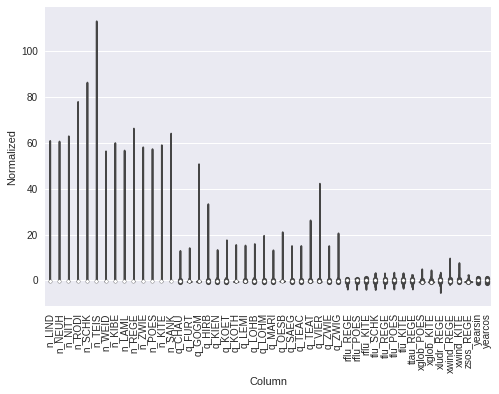

In [ ]:
# normalize the data
train_mean = train_df.mean()
train_std = train_df.std()
# print(train_mean.shape)


train_df_normal = (train_df - train_mean) / train_std
val_df_normal = (val_df - train_mean) / train_std
test_df_normal = (test_df - train_mean) / train_std

df_normal = (df - train_mean) / train_std

# https://www.geeksforgeeks.org/python-pandas-melt/
df_normal = df_normal.melt(var_name='Column', value_name='Normalized')

plt.figure()

ax = sns.violinplot(x='Column', y='Normalized', data=df_normal)
_ = ax.set_xticklabels(df.keys(), rotation=90)


In [ ]:
# data filling
fill_value = -7.0

train_df_normal_fill = train_df_normal.fillna(fill_value)
val_df_normal_fill = val_df_normal.fillna(fill_value)
test_df_normal_fill = test_df_normal.fillna(fill_value)

print(f'is sum null train_df_normal_fill: {train_df_normal_fill.isnull().sum().sum()}')
print(f'is sum null val_df_normal_fill: {val_df_normal_fill.isnull().sum().sum()}')
print(f'is sum null test_df_normal_fill: {test_df_normal_fill.isnull().sum().sum()}')



is sum null train_df_normal_fill: 0
is sum null val_df_normal_fill: 0
is sum null test_df_normal_fill: 0
